In [ ]:
'''
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29
'''

In [ ]:
from google.colab import files
upload=files.upload()

Saving gas_turbines.csv to gas_turbines (1).csv


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("gas_turbines (1).csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
len(data)

15039

In [ ]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


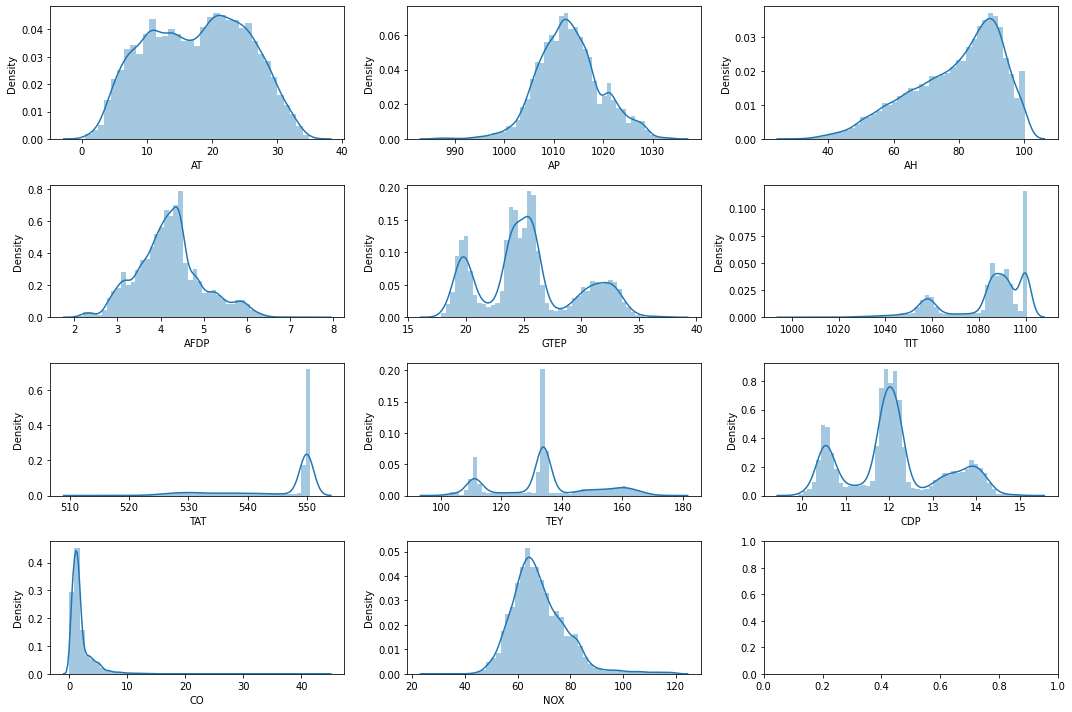

In [ ]:
#checking normal distribution of the data using distplot

fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.distplot(data.AT,ax=ax[0,0])
sns.distplot(data.AP,ax=ax[0,1])
sns.distplot(data.AH,ax=ax[0,2])
sns.distplot(data.AFDP,ax=ax[1,0])
sns.distplot(data.GTEP,ax=ax[1,1])
sns.distplot(data.TIT,ax=ax[1,2])
sns.distplot(data.TAT,ax=ax[2,0])
sns.distplot(data.TEY,ax=ax[2,1])
sns.distplot(data.CDP,ax=ax[2,2])
sns.distplot(data.CO,ax=ax[3,0])
sns.distplot(data.NOX,ax=ax[3,1])

plt.tight_layout()
plt.show()

In [ ]:
abs(data.corr()["TEY"]).sort_values()

NOX     0.102631
AH      0.110272
AP      0.146939
AT      0.207495
CO      0.541751
AFDP    0.717995
TAT     0.720356
TIT     0.891587
GTEP    0.977042
CDP     0.988473
TEY     1.000000
Name: TEY, dtype: float64

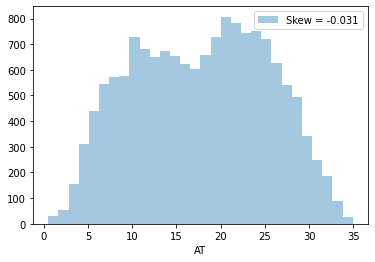

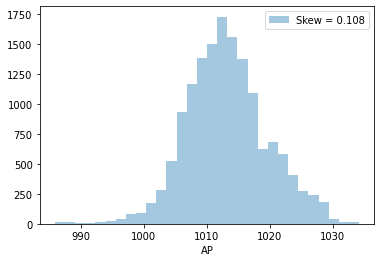

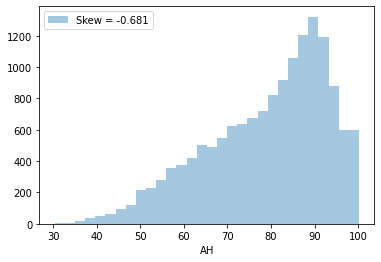

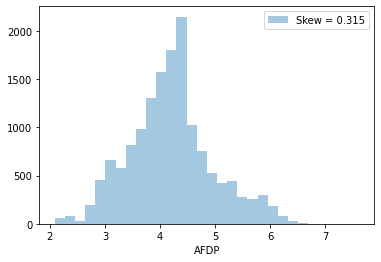

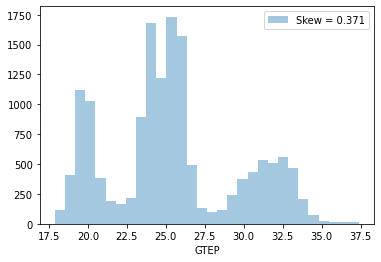

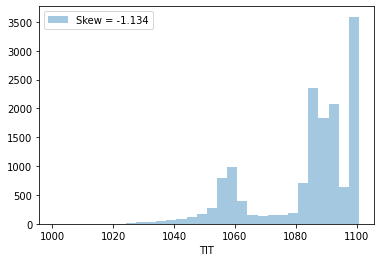

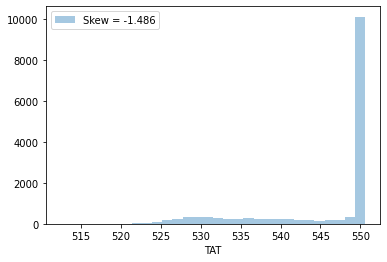

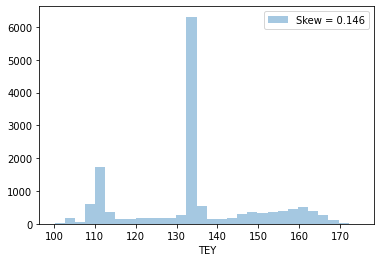

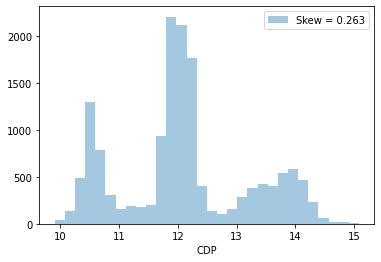

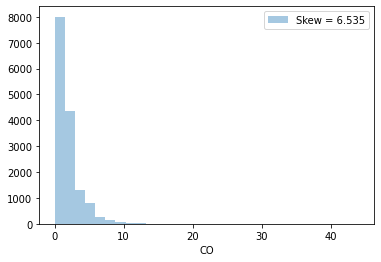

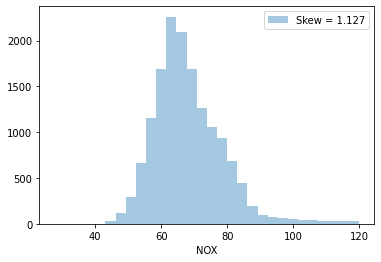

In [ ]:
import seaborn as sns
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for i in numerical_features:
    skew = data[i].skew()
    sns.distplot(data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

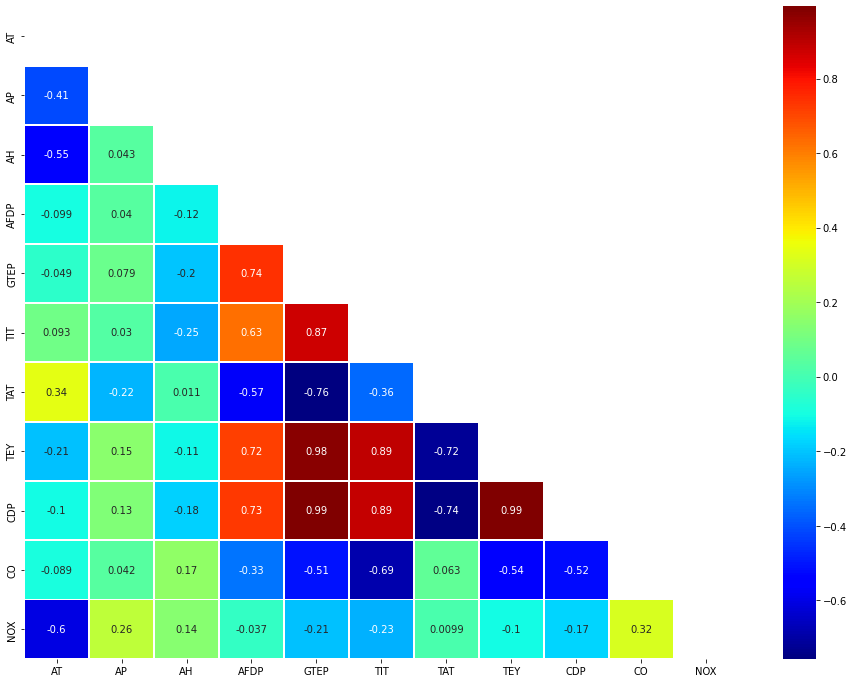

In [ ]:
plt.figure(figsize=(16,12))
mask=np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=data.corr(),cmap="jet",annot=True,linewidths=1, linecolor='white',mask=mask)


In [ ]:
data.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data.iloc[:,:]= scaler.fit_transform(data.iloc[:,].values)

data.head()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591


In [ ]:
#we can ignore NOX, AH, AP as its having very less impact on TEY 

scaled_data=data[['AT','AFDP','GTEP','TIT','TAT','TEY','CDP','CO']]
scaled_data.head()

,AT,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,-1.439778,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012
1,-1.449601,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733
2,-1.434721,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938
3,-1.413702,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933
4,-1.368693,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179


In [ ]:
#splitting data into x and y
x=scaled_data.drop('TEY',axis=1)
y=scaled_data['TEY']

In [ ]:
x.head()

,AT,AFDP,GTEP,TIT,TAT,CDP,CO
0,-1.439778,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012
1,-1.449601,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733
2,-1.434721,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938
3,-1.413702,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933
4,-1.368693,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179


In [ ]:
#fixing a random seed
seed=7
np.random.seed(seed)

In [ ]:
#constructng a sequential meural network with 12 neurons in first layer , 8 neurons in hidden layer adnd 1 neuron in output layer

model=Sequential()
model.add(Dense(12,input_dim=7,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(x,y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 0.6271 - accuracy: 0.0000e+00 - val_loss: 0.6260 - val_accuracy: 0.0000e+00
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5283 - accuracy: 0.0000e+00 - val_loss: 0.6249 - val_accuracy: 0.0000e+00
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.0000e+00 - val_loss: 0.6246 - val_accuracy: 0.0000e+00
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5270 - accuracy: 0.0000e+00 - val_loss: 0.6241 - val_accuracy: 0.0000e+00
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5267 - accuracy: 0.0000e+00 - val_loss: 0.6241 - val_accuracy: 0.0000e+00
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5265 - accuracy: 0.0000e+00 - val_loss: 0.6238 - val_accuracy: 0.0000e+00
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.526

In [ ]:
#evaluation of the model
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.5580 - accuracy: 0.0000e+00
accuracy: 0.00%


In [ ]:
#list all the evaluaton metric in built model(history)

history = model.fit(x, y, validation_split=0.33, epochs=100, batch_size=10)
model.history.history.keys

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5259 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5259 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5259 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5258 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5258 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5258 - accuracy: 0.0000e+00 - val_loss: 0.6234 - val_accuracy: 0.0000e+00
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.525

<function dict.keys>

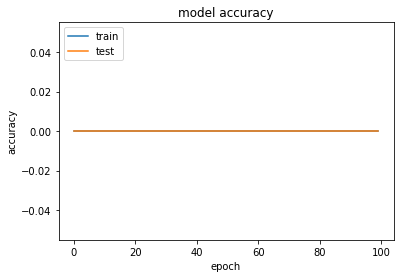

In [ ]:
#visulizing the model history for train and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

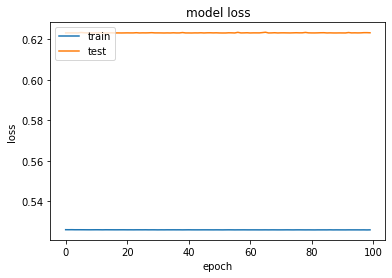

In [ ]:
#visualising the model history fro train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#creatng a user defined function 
def create_model():
  model=Sequential()
  model.add(Dense(12, input_dim=7, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

  adam=Adam(lr=0.01)
  model.compile(loss='mse',optimizer=adam,metrics=['accuracy'])
  return model

In [ ]:
#using gridsearch CV , to find best parameters that contributes to higher regression
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=7)


In [ ]:
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=  17.3s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=  21.7s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=  17.8s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=  17.7s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=  18.0s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.000 total time= 1.4min
[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.000 total time= 1.7min
[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.000 total time= 1.4min
[CV 1/5] END .........batch_size=10, epochs=100;, score=0.000 total time= 3.4min
[CV 2/5] END .........batch_size=10, epochs=100;,